In [1]:
from matplotlib import pyplot as plt
from skimage import morphology
from scipy.spatial import distance_matrix
import numpy as np
from itertools import product
from scipy.ndimage.morphology import distance_transform_cdt
from urban_growth.city_model_2 import *
%matplotlib inline

In [11]:
# Params

## Initial Configuration
L = 100
rho = .44
blur = 2

## Rural/Urban Size Threshold
T = 20

## Dynamical Parameters, not assuming that these are good ones. 

pars = {'gamma_r' : 1.5,     # rural settlement more diffuse than urban
        'gamma_u' : 2.5,      
        'alpha_r' : 1,       
        'alpha_u' : 2,
        'beta_r'  : -2,      # low background rates
        'beta_u'  : -1}

geo = np.ones((L, L))


geo[:,(L/2+1):] = .5

# Initialize the Model

In [12]:
m = settlement_model(geo = geo)
m.set_M0(L = L, density = rho, blur = blur)

# Classify Existing Settlements

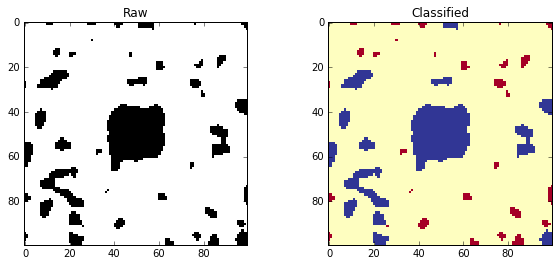

In [13]:
fig = plt.figure(figsize = (10, 4))

ax1 = fig.add_subplot(121)
ax1.imshow(m.get_M0(), interpolation = 'nearest', cmap = 'Greys')
plt.title('Raw')

ax2 = fig.add_subplot(122)
ax2.imshow(m.settlement_type_matrix(T), interpolation = 'nearest', cmap = 'RdYlBu')
plt.title('Classified')

# Probability Density for New Settlements

The code below computes settlement probabilities across all unoccupied sites under the parameters specified above. It is thus the foundation of the "forward" step. White areas are already settled. Warmer colors indicate higher likelihood to be settled. The plots below are made using Phil's revision of Ema's model (i.e. the logistic-based "Model 1"), as this is faster to compute. 

Note that this computation is a bit costly in terms of storing the distances: for $L = 200$ ($N = L^2 = 40,000$ pixels), it takes about ~30 seconds on Phil's personal machine. 

In [14]:
densities = m.density(T, pars, use_geo = True)

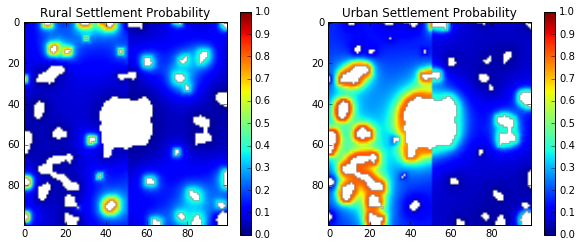

In [15]:
fig = plt.figure(figsize = (10, 4))
ax1 = fig.add_subplot(121)
im = ax1.imshow(densities[0], vmin = 0, vmax = 1)
plt.colorbar(im)
plt.title('Rural Settlement Probability')

ax2 = fig.add_subplot(122)
im = ax2.imshow(densities[1], vmin = 0, vmax = 1)
plt.colorbar(im)
plt.title('Urban Settlement Probability')

These two densities add up to the total likelihood of settlement in the next time step: 

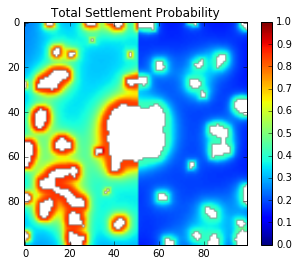

In [16]:
fig = plt.figure(figsize = (5, 4))

ax = fig.add_subplot(111)
im = ax.imshow(densities[0] + densities[1], vmin = 0, vmax = 1)
plt.colorbar(im)
plt.title('Total Settlement Probability')